In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Actividad 1: Proceso de Wiener
Se define el proceso de Wiener como
$$W(t) = \int_{0}^{t}dW$$
donde dW es una variable aleatoria con distribución Gaussiana, $\langle dW\rangle = 0$ y $\langle dW^2\rangle = dt$

Simularemos el proceso de Wiener numéricamente en un intervalo de 100 segundos.
Dividiremos el espacio del tiempo en $N$ intervalos $dt$

1. Utiliza un generador de números aleatorios para simular incrementos $dW$. Asegúrate de que su varianza es igual a $dt$, y grafica $dW$ vs $t$
2. Realiza una suma acumulada de los incrementos para obtener los valores del proceso $W(t)$. Grafica $W(t)$ vs $t$.

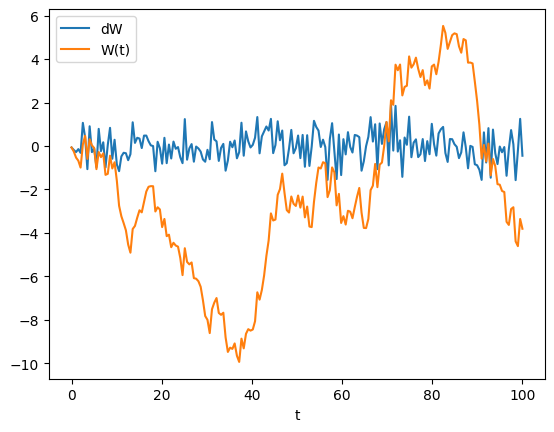

In [2]:
N = 200
tf = 100
t_ = np.linspace(0, tf, N)
dt = t_[1] - t_[0]

dW_ = np.zeros(N)
W_ = np.zeros(N)
W = 0

for i in range(N):
    dW_[i] = np.random.default_rng().normal(0, np.sqrt(dt))
    W += dW_[i]
    W_[i] = W

plt.plot(t_, dW_, label="dW")
plt.plot(t_, W_, label="W(t)")
plt.xlabel("t")
plt.legend()
plt.show()


Lo que obtuviste antes es solo una realización del proceso estocástico. Si queremos encontrar propiedades de la distribución, necesitamos realizar el proceso muchas veces.

3. Realiza el proceso un mínimo de 300 veces. Muestra en una sola gráfica todas las
realizaciones de $W(t)$. (Sugerencia: utiliza una transparencia en las líneas de la gráfica para tener
una idea de la densidad de probabilidad del proceso a lo largo del tiempo.)
4. Grafica la varianza de $W(t)$, $\sigma^2(W(t))$ conforme pasa el
tiempo. ¿Es lo que esperas obtener? (Ojo: la varianza es el promedio del cuadrado de todas las
realizaciones en un instante de tiempo) Se espera obtener $g^2 t$.
5. Realiza los puntos 3 y 4 con un tamaño de paso $dt$ más pequeño. Compara tus resultados.


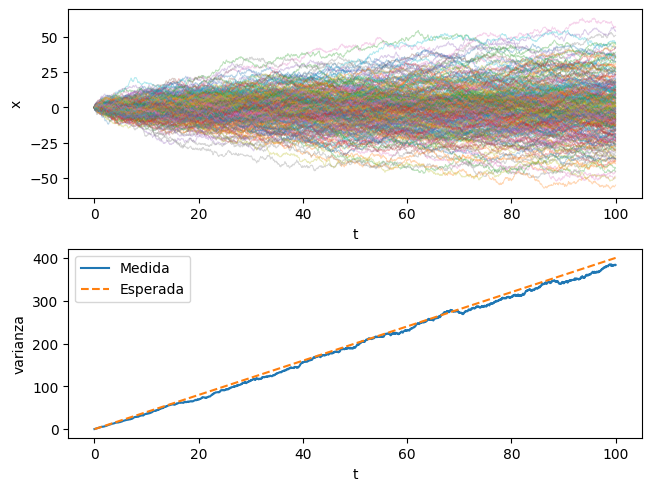

In [4]:
lines = 300

g = 2
N = 2000
tf = 100
t_ = np.linspace(0, tf, N)
dt = t_[1] - t_[0]

dW_ = np.zeros((lines, N))
W_ = np.zeros((lines, N))
W = np.zeros(lines)
sigma2_ = np.zeros(N)
s2_theoretical = g**2 * t_

for i in range(N):
    dW_[:, i] = np.random.default_rng().normal(0, np.sqrt(dt), lines)
    W += g*dW_[:, i]
    W_[:, i] = W
    sigma2_[i] = np.average(W**2)

fig, axs = plt.subplots(2, 1, layout="constrained")

for i in range(lines):
    axs[0].plot(t_, W_[i], alpha=0.3, linewidth=0.7)

axs[0].set_xlabel("t")
axs[0].set_ylabel("x")

axs[1].plot(t_, sigma2_, label="Medida")
axs[1].plot(t_, s2_theoretical, "--", label="Esperada")
axs[1].set_xlabel("t")
axs[1].set_ylabel("varianza")
axs[1].legend()
plt.show()


6. Ahora haz que la varianza de los intervalos sea $\langle dW^2\rangle = dt^2$. Al igual que en el caso anterior, compara el análisis hecho con varios tamaños de paso . (¿Que puedes concluir de esta comparación?)
7. Demuestra analíticamente que sólo cuando $\langle dW^2\rangle = dt$, la suma de los intervalos sss es independiente del número de intervalos.

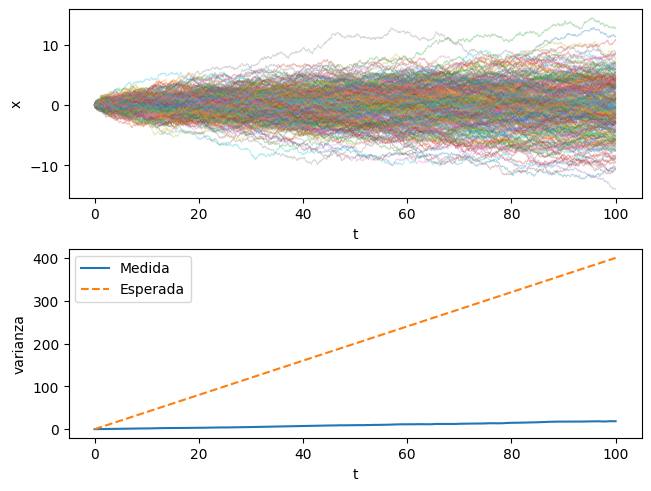

In [6]:
lines = 300

g = 2
N = 2000
tf = 100
t_ = np.linspace(0, tf, N)
dt = t_[1] - t_[0]

dW_ = np.zeros((lines, N))
W_ = np.zeros((lines, N))
W = np.zeros(lines)
sigma2_ = np.zeros(N)
s2_theoretical = g**2 * t_

for i in range(N):
    dW_[:, i] = np.random.default_rng().normal(0, dt, lines)
    W += g*dW_[:, i]
    W_[:, i] = W
    sigma2_[i] = np.average(W**2)

fig, axs = plt.subplots(2, 1, layout="constrained")

for i in range(lines):
    axs[0].plot(t_, W_[i], alpha=0.3, linewidth=0.7)

axs[0].set_xlabel("t")
axs[0].set_ylabel("x")

axs[1].plot(t_, sigma2_, label="Medida")
axs[1].plot(t_, s2_theoretical, "--", label="Esperada")
axs[1].set_xlabel("t")
axs[1].set_ylabel("varianza")
axs[1].legend()
plt.show()

En clase vimos que un proceso $x(t)$ descrito por la ecuación diferencial estocástica:
$$dx = f(x, t)dt + g(x, t)dW$$
Tiene una distribución de probabilidad $P(x, t)$ dada por la ecuación de Fokker-Planck:
$$\frac{\partial}{\partial t} P(x, t) = - \frac{\partial}{\partial x}[f(x, t)P(x, t)] + \frac{\partial^2}{\partial x^2}[D(x, t)P(x, t)]$$
donde $D(x, t) = \frac{g^2(x, t)}{2}$

8. Escribe la ecuación diferencial parcial que describe la distribución de probabilidad
𝑃(𝑊(𝑡), 𝑡) para el proceso 𝑊(𝑡) que simulaste en los puntos anteriores.
9. Grafica, en un solo panel, el histograma de los procesos 𝑊(𝑡) que simulaste
numéricamente para los tiempos 𝑡 = {25,50,75,100} sec. Grafica también la solución
analítica a la ecuación que escribiste en el punto 8. Compara ambos resultados.

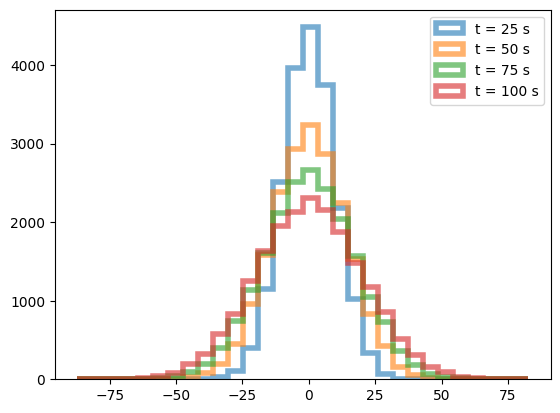

In [2]:
lines = 20000

g = 2
N = 500
tf = 100
t_ = np.linspace(0, tf, N)
dt = t_[1] - t_[0]

dW_ = np.zeros((lines, N))
W_ = np.zeros((lines, N))
W = np.zeros(lines)
sigma2_ = np.zeros(N)
s2_theoretical = g**2 * t_

for i in range(N):
    dW_[:, i] = np.random.default_rng().normal(0, np.sqrt(dt), lines)
    W += g*dW_[:, i]
    W_[:, i] = W
    sigma2_[i] = np.average(W**2)

ti = [25, 50, 75, 100]
ti_idx = np.floor(ti/dt)

fig, ax = plt.subplots()
bins = np.histogram(W, bins=30)[1] #get the bin edges

for i in range(len(ti)):
    plt.hist(W_[:, int(ti_idx[i])], bins=bins, histtype="step", linewidth=4, alpha=0.6, label=f"t = {ti[i]} s")

plt.legend()
plt.show()


(404, 120)
[100 200 300 400]


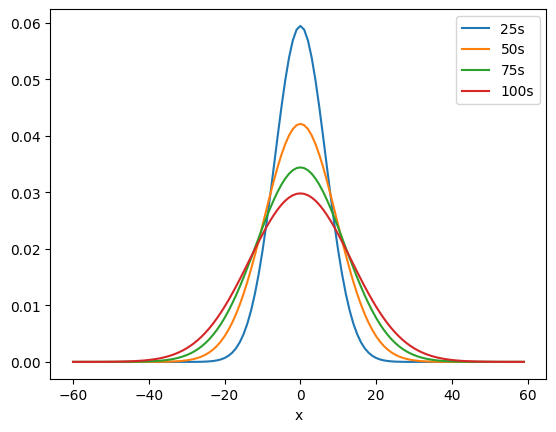

In [23]:
def euler(dfun, tspan, x0, conds=False, cond_fun=None):
    a = tspan[0]
    b = tspan[1]
    dt = tspan[2]
    t_ = np.arange(a, b, dt)
    n = tuple([len(t_)])
    m = np.shape(x0)
    shape = n + m
    print(shape)
    fun = np.zeros(shape)
    fun[0] = x0
    fun[1] = dt * dfun(t_[0], fun[0]) + fun[0]
    for i in range(1, shape[0]-1):
        fun[i+1] = 2 * dt * dfun(t_[i], fun[i]) + fun[i-1]
        if conds:
            fun[i+1, 0] = cond_fun(fun[i+1, 0])
    return t_, fun

def laplace(M, pad=False):
    '''
    Operador laplaciano para n dimensiones, frontera seleccionable
    pad = False -> Periódica
    pad = True -> Frontera reflejante
    '''
    dims = len(np.shape(M))
    if pad:
      M = np.pad(M, 1, mode="edge")
    S = 0
    for i in range(dims):
        S = S + np.roll(M, 1, axis=i) + np.roll(M, -1, axis=i)
    
    S = S - 2*dims*M
    if pad:
      S = S[1:-1, 1:-1]
    return S

g = 2
tf = 101

D = g**2/2
dx = 1
a = -60
b = 60
x_ = np.arange(a, b, dx)
n = len(x_)
x0 = np.zeros(n)
x0[n//2] = 1
dt = dx**2 / 4

def dfun(t, x):
    dP = D * laplace(x) / dx**2
    return dP

tspan = (0, tf, dt)

t_, fun = euler(dfun, tspan, x0)
fun_norm = np.abs(fun)
fun_norm = fun_norm / fun_norm.sum(axis=1, keepdims=True)

idx = np.int32(np.floor(np.array([25, 50, 75, 100]) / dt))
print(idx)
plt.plot(x_, fun_norm[idx[0]], label="25s")
plt.plot(x_, fun_norm[idx[1]], label="50s")
plt.plot(x_, fun_norm[idx[2]], label="75s")
plt.plot(x_, fun_norm[idx[3]], label="100s")
plt.legend()
plt.xlabel("x")
plt.show()